In [2]:
import boto3

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sagemaker import get_execution_role

role = get_execution_role()

s3 = boto3.client("s3")
resource = boto3.resource("s3")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [3]:
gdp_food_household_merge = pd.read_csv("gdp_food_household_merge.csv")
gdp_food_household_merge

,Rank,County,GDP in 0KSh. millions/=,GDP in US dollar millions (PPP),Former province,Area (km2),Population (2019 Census),Capital,admin2,category,...,total_percent_solar,total_percent_generator,grid_generator_pct,grid_battery_pct,grid_solar_pct,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,1.0,nairobi,1492323.0,27798.0,Nairobi,694.9,4397073.0,Nairobi,Nairobi,cereals and tubers,...,0.089984,0.007018,0.007198,0.012248,0.092293,0.000000,0.000000,0.000000,128.050729,6321.932795
1,2.0,nakuru,517462.0,10333.0,Rift Valley,7509.5,2162202.0,Nakuru[8][9],Nakuru,cereals and tubers,...,0.000000,0.008441,0.010173,0.000000,0.000000,0.000000,0.000000,0.000000,48.542111,4778.924448
2,3.0,kiambu,421918.0,8425.0,Central,2449.2,2417735.0,Kiambu,NaN,NaN,...,0.106712,0.000000,0.000000,0.000000,0.065890,0.000000,0.000000,0.181421,0.783342,3484.666434
3,4.0,mombasa,332122.0,6632.0,Coast,212.5,1208333.0,Mombasa,Mombasa,cereals and tubers,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550000,5488.553238
4,5.0,nyandarua,245203.0,4896.0,Central,3107.7,638289.0,Ol Kalou,NaN,NaN,...,0.560536,0.000000,0.000000,0.000000,0.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,6.0,machakos,232860.0,4650.0,Eastern,5952.9,1421932.0,Machakos,NaN,NaN,...,0.194563,0.000000,0.000000,0.000000,0.072671,0.000000,0.032444,0.645638,45.031500,3270.198575
6,7.0,meru,229646.0,4585.0,Eastern,7003.1,1545714.0,Meru,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2966.266722
7,8.0,kisumu,194489.0,3883.0,Nyanza,2009.5,1155574.0,Kisumu,Kisumu,cereals and tubers,...,0.399393,0.022562,0.000000,0.000000,0.204136,0.033457,0.078993,0.493684,117.608263,3360.234827
8,9.0,bungoma,183509.0,3664.0,Western,2206.9,1670570.0,Bungoma,NaN,NaN,...,0.315666,0.000000,0.000000,0.000000,0.192905,0.000000,0.068512,0.336268,15.212027,2193.263377
9,10.0,kakamega,182563.0,3645.0,Western,3033.8,1867579.0,Kakamega,NaN,NaN,...,0.279470,0.000000,0.000000,0.000000,0.156060,0.000000,0.075590,0.313628,219.828169,1951.724666


In [4]:
gdp_food_household_merge2 = pd.read_csv("gdp_food_household_merge_v2.csv")
gdp_food_household_merge2

,Rank,County,GDP in 0KSh. millions/=,GDP in US dollar millions (PPP),Former province,Area (km2),Population (2019 Census),Capital,admin2,category,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,1.0,nairobi,1492323.0,27798.0,Nairobi,694.9,4397073.0,Nairobi,Nairobi,cereals and tubers,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,2.0,nakuru,517462.0,10333.0,Rift Valley,7509.5,2162202.0,Nakuru[8][9],Nakuru,cereals and tubers,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,3.0,kiambu,421918.0,8425.0,Central,2449.2,2417735.0,Kiambu,NaN,NaN,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,4.0,mombasa,332122.0,6632.0,Coast,212.5,1208333.0,Mombasa,Mombasa,cereals and tubers,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,5.0,nyandarua,245203.0,4896.0,Central,3107.7,638289.0,Ol Kalou,NaN,NaN,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,6.0,machakos,232860.0,4650.0,Eastern,5952.9,1421932.0,Machakos,NaN,NaN,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,7.0,meru,229646.0,4585.0,Eastern,7003.1,1545714.0,Meru,NaN,NaN,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,8.0,kisumu,194489.0,3883.0,Nyanza,2009.5,1155574.0,Kisumu,Kisumu,cereals and tubers,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,9.0,bungoma,183509.0,3664.0,Western,2206.9,1670570.0,Bungoma,NaN,NaN,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,10.0,kakamega,182563.0,3645.0,Western,3033.8,1867579.0,Kakamega,NaN,NaN,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [5]:
gdp_food_household_merge.columns

Index(['Rank', 'County', 'GDP in 0KSh. millions/=',
       'GDP in US dollar millions (PPP)', 'Former province', 'Area (km2)',
       'Population (2019 Census)', 'Capital', 'admin2', 'category', 'usdprice',
       'county', 'num_households', 'total_inhabitants', 'avg_household_size',
       'avg_household_per_dwelling', 'pct_own_dwelling', 'avg_rooms_occupied',
       'percent_grid_connect', 'percent_bank_account', 'percent_mobile_money',
       'total_percent_batteries', 'total_percent_solar',
       'total_percent_generator', 'grid_generator_pct', 'grid_battery_pct',
       'grid_solar_pct', 'not_grid_generator_pct', 'not_grid_battery_pct',
       'not_grid_solar_pct', 'avg_distance_to_connect',
       'GDP percapita in US dollar (PPP)'],
      dtype='object')

In [6]:
gdp_food_household_merge2.columns

Index(['Rank', 'County', 'GDP in 0KSh. millions/=',
       'GDP in US dollar millions (PPP)', 'Former province', 'Area (km2)',
       'Population (2019 Census)', 'Capital', 'admin2', 'category', 'usdprice',
       'county', 'num_households', 'total_inhabitants', 'avg_household_size',
       'avg_household_per_dwelling', 'pct_own_dwelling', 'avg_rooms_occupied',
       'percent_grid_connect', 'percent_any_elect', 'percent_bank_account',
       'percent_mobile_money', 'total_percent_batteries',
       'total_percent_solar', 'total_percent_generator', 'grid_generator_pct',
       'grid_battery_pct', 'grid_solar_pct', 'avg_electricity_use_grid',
       'avg_typical_hours_elect_grid', 'avg_worst_hours_elect_grid',
       'not_grid_generator_pct', 'not_grid_battery_pct', 'not_grid_solar_pct',
       'avg_distance_to_connect', 'GDP percapita in US dollar (PPP)'],
      dtype='object')

In [7]:
len(gdp_food_household_merge2.columns)

36

In [8]:
len(gdp_food_household_merge.columns)

32

In [9]:
gdp_food_household_merge['Population (2019 Census)'].sum()

48142296.0

In [10]:
gdp_food_household_merge['num_households'].sum()

791040639.283493

In [11]:
gdp_food_household_merge['total_inhabitants'].sum()

2888470747.0030766

In [12]:
gdp_food_household_merge[['County','county']]

,County,county
0,nairobi,nairobi
1,nakuru,nakuru
2,kiambu,kiambu
3,mombasa,mombasa
4,nyandarua,nyandarua
5,machakos,machakos
6,meru,NaN
7,kisumu,kisumu
8,bungoma,bungoma
9,kakamega,kakamega


In [13]:
gdp_food_household_merge['num_households'].describe()

count    3.800000e+01
mean     2.081686e+07
std      9.023946e+07
min      1.998359e+04
25%      2.165594e+06
50%      4.719557e+06
75%      8.835010e+06
max      5.612303e+08
Name: num_households, dtype: float64

In [14]:
gdp_food_household_merge['total_inhabitants'].describe()

count    3.800000e+01
mean     7.601239e+07
std      2.976111e+08
min      1.199015e+05
25%      7.783671e+06
50%      1.925024e+07
75%      3.724032e+07
max      1.852265e+09
Name: total_inhabitants, dtype: float64

In [15]:
gdp_food_household_merge['avg_household_size'].describe()

count    38.000000
mean      4.275513
std       0.865988
min       2.637249
25%       3.627668
50%       4.198948
75%       4.734318
max       6.611428
Name: avg_household_size, dtype: float64

In [16]:
gdp_food_household_merge['avg_household_per_dwelling'].describe()

count    38.000000
mean      1.661445
std       0.984712
min       1.000000
25%       1.122378
50%       1.358822
75%       1.659157
max       5.627872
Name: avg_household_per_dwelling, dtype: float64

In [17]:
gdp_food_household_merge['pct_own_dwelling'].describe()

count    38.000000
mean      0.807920
std       0.232163
min       0.104640
25%       0.753036
50%       0.876871
75%       0.946874
max       1.000000
Name: pct_own_dwelling, dtype: float64

In [18]:
gdp_food_household_merge['avg_rooms_occupied'].describe()

count    38.000000
mean      2.719014
std       0.593577
min       1.500000
25%       2.412182
50%       2.810724
75%       3.016893
max       4.070102
Name: avg_rooms_occupied, dtype: float64

In [19]:
gdp_food_household_merge['percent_grid_connect'].describe()

count    38.000000
mean      0.293359
std       0.270293
min       0.000000
25%       0.115828
50%       0.210481
75%       0.351315
max       0.974988
Name: percent_grid_connect, dtype: float64

In [20]:
gdp_food_household_merge['percent_bank_account'].describe()

count    38.000000
mean      0.446249
std       0.203549
min       0.023782
25%       0.292176
50%       0.441312
75%       0.599417
max       0.906949
Name: percent_bank_account, dtype: float64

In [21]:
gdp_food_household_merge['percent_mobile_money'].describe()

count    38.000000
mean      0.802484
std       0.151514
min       0.459516
25%       0.709476
50%       0.847112
75%       0.922818
max       1.000000
Name: percent_mobile_money, dtype: float64

In [22]:
gdp_food_household_merge['total_percent_batteries'].describe()

count    38.000000
mean      0.053775
std       0.094050
min       0.000000
25%       0.000000
50%       0.014647
75%       0.071503
max       0.517142
Name: total_percent_batteries, dtype: float64

In [23]:
gdp_food_household_merge['total_percent_solar'].describe()

count    38.000000
mean      0.352028
std       0.203410
min       0.000000
25%       0.213811
50%       0.313186
75%       0.508258
max       0.884047
Name: total_percent_solar, dtype: float64

In [24]:
gdp_food_household_merge['total_percent_generator'].describe()

count    38.000000
mean      0.010134
std       0.020999
min       0.000000
25%       0.000000
50%       0.000000
75%       0.008241
max       0.087895
Name: total_percent_generator, dtype: float64

In [25]:
gdp_food_household_merge['grid_generator_pct'].describe()

count    36.000000
mean      0.013018
std       0.032893
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.120507
Name: grid_generator_pct, dtype: float64

In [26]:
gdp_food_household_merge[['grid_battery_pct','grid_solar_pct','not_grid_generator_pct','not_grid_battery_pct','not_grid_solar_pct']].describe()

,grid_battery_pct,grid_solar_pct,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct
count,36.000000,36.000000,38.000000,38.000000,38.000000
mean,0.006295,0.150477,0.009229,0.067700,0.407102
std,0.031603,0.167347,0.022425,0.116592,0.225186
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.282638
50%,0.000000,0.107997,0.000000,0.022503,0.394973
75%,0.000000,0.212277,0.000000,0.085426,0.542320
max,0.188597,0.739773,0.090909,0.621273,0.987055


In [27]:
gdp_food_household_merge['avg_distance_to_connect'].describe()

count     38.000000
mean     130.008399
std      188.106984
min        0.500000
25%        3.675000
50%       60.036975
75%      144.589317
max      785.840000
Name: avg_distance_to_connect, dtype: float64

In [28]:
cols_to_drop = ['Rank', 'GDP in 0KSh. millions/=', 'GDP in US dollar millions (PPP)', 'admin2', 'Former province', 'Capital', 'category', 'usdprice', 'county',
                'total_inhabitants', 'num_households']
print(len(cols_to_drop))

11


In [29]:
gdp_food_household_merge.columns

Index(['Rank', 'County', 'GDP in 0KSh. millions/=',
       'GDP in US dollar millions (PPP)', 'Former province', 'Area (km2)',
       'Population (2019 Census)', 'Capital', 'admin2', 'category', 'usdprice',
       'county', 'num_households', 'total_inhabitants', 'avg_household_size',
       'avg_household_per_dwelling', 'pct_own_dwelling', 'avg_rooms_occupied',
       'percent_grid_connect', 'percent_bank_account', 'percent_mobile_money',
       'total_percent_batteries', 'total_percent_solar',
       'total_percent_generator', 'grid_generator_pct', 'grid_battery_pct',
       'grid_solar_pct', 'not_grid_generator_pct', 'not_grid_battery_pct',
       'not_grid_solar_pct', 'avg_distance_to_connect',
       'GDP percapita in US dollar (PPP)'],
      dtype='object')

In [30]:
cols_to_keep = []
for j in gdp_food_household_merge.columns:
    if j not in cols_to_drop:
        cols_to_keep.append(j)
cols_to_keep

['County',
 'Area (km2)',
 'Population (2019 Census)',
 'avg_household_size',
 'avg_household_per_dwelling',
 'pct_own_dwelling',
 'avg_rooms_occupied',
 'percent_grid_connect',
 'percent_bank_account',
 'percent_mobile_money',
 'total_percent_batteries',
 'total_percent_solar',
 'total_percent_generator',
 'grid_generator_pct',
 'grid_battery_pct',
 'grid_solar_pct',
 'not_grid_generator_pct',
 'not_grid_battery_pct',
 'not_grid_solar_pct',
 'avg_distance_to_connect',
 'GDP percapita in US dollar (PPP)']

In [31]:
len(cols_to_keep)

21

In [32]:
new_gdp_food_household_merge = gdp_food_household_merge[cols_to_keep]
new_gdp_food_household_merge

,County,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_bank_account,percent_mobile_money,...,total_percent_solar,total_percent_generator,grid_generator_pct,grid_battery_pct,grid_solar_pct,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,nairobi,694.9,4397073.0,3.300365,4.168181,0.153638,2.526831,0.974988,0.713857,0.885217,...,0.089984,0.007018,0.007198,0.012248,0.092293,0.000000,0.000000,0.000000,128.050729,6321.932795
1,nakuru,7509.5,2162202.0,5.404080,1.708355,0.921864,3.014457,0.829664,0.529854,0.986171,...,0.000000,0.008441,0.010173,0.000000,0.000000,0.000000,0.000000,0.000000,48.542111,4778.924448
2,kiambu,2449.2,2417735.0,2.929102,4.003717,0.200437,1.775019,0.646652,0.713815,0.925965,...,0.106712,0.000000,0.000000,0.000000,0.065890,0.000000,0.000000,0.181421,0.783342,3484.666434
3,mombasa,212.5,1208333.0,3.497872,5.627872,0.318308,2.992462,0.940000,0.906949,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550000,5488.553238
4,nyandarua,3107.7,638289.0,3.693020,1.112882,1.000000,2.406718,0.018093,0.670830,0.943559,...,0.560536,0.000000,0.000000,0.000000,0.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,machakos,5952.9,1421932.0,2.637249,2.565209,0.104640,1.678773,0.787262,0.658743,1.000000,...,0.194563,0.000000,0.000000,0.000000,0.072671,0.000000,0.032444,0.645638,45.031500,3270.198575
6,meru,7003.1,1545714.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2966.266722
7,kisumu,2009.5,1155574.0,4.619518,1.311973,0.747273,2.517812,0.325652,0.521057,0.935471,...,0.399393,0.022562,0.000000,0.000000,0.204136,0.033457,0.078993,0.493684,117.608263,3360.234827
8,bungoma,2206.9,1670570.0,5.327569,2.145785,0.918440,2.873619,0.143707,0.326173,0.847515,...,0.315666,0.000000,0.000000,0.000000,0.192905,0.000000,0.068512,0.336268,15.212027,2193.263377
9,kakamega,3033.8,1867579.0,4.192861,1.394692,0.812013,2.770939,0.216781,0.222149,0.817166,...,0.279470,0.000000,0.000000,0.000000,0.156060,0.000000,0.075590,0.313628,219.828169,1951.724666


In [33]:
new_gdp_food_household_merge = new_gdp_food_household_merge.iloc[:-1]
new_gdp_food_household_merge

,County,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_bank_account,percent_mobile_money,...,total_percent_solar,total_percent_generator,grid_generator_pct,grid_battery_pct,grid_solar_pct,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,nairobi,694.9,4397073.0,3.300365,4.168181,0.153638,2.526831,0.974988,0.713857,0.885217,...,0.089984,0.007018,0.007198,0.012248,0.092293,0.000000,0.000000,0.000000,128.050729,6321.932795
1,nakuru,7509.5,2162202.0,5.404080,1.708355,0.921864,3.014457,0.829664,0.529854,0.986171,...,0.000000,0.008441,0.010173,0.000000,0.000000,0.000000,0.000000,0.000000,48.542111,4778.924448
2,kiambu,2449.2,2417735.0,2.929102,4.003717,0.200437,1.775019,0.646652,0.713815,0.925965,...,0.106712,0.000000,0.000000,0.000000,0.065890,0.000000,0.000000,0.181421,0.783342,3484.666434
3,mombasa,212.5,1208333.0,3.497872,5.627872,0.318308,2.992462,0.940000,0.906949,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550000,5488.553238
4,nyandarua,3107.7,638289.0,3.693020,1.112882,1.000000,2.406718,0.018093,0.670830,0.943559,...,0.560536,0.000000,0.000000,0.000000,0.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,machakos,5952.9,1421932.0,2.637249,2.565209,0.104640,1.678773,0.787262,0.658743,1.000000,...,0.194563,0.000000,0.000000,0.000000,0.072671,0.000000,0.032444,0.645638,45.031500,3270.198575
6,meru,7003.1,1545714.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2966.266722
7,kisumu,2009.5,1155574.0,4.619518,1.311973,0.747273,2.517812,0.325652,0.521057,0.935471,...,0.399393,0.022562,0.000000,0.000000,0.204136,0.033457,0.078993,0.493684,117.608263,3360.234827
8,bungoma,2206.9,1670570.0,5.327569,2.145785,0.918440,2.873619,0.143707,0.326173,0.847515,...,0.315666,0.000000,0.000000,0.000000,0.192905,0.000000,0.068512,0.336268,15.212027,2193.263377
9,kakamega,3033.8,1867579.0,4.192861,1.394692,0.812013,2.770939,0.216781,0.222149,0.817166,...,0.279470,0.000000,0.000000,0.000000,0.156060,0.000000,0.075590,0.313628,219.828169,1951.724666


In [34]:
new_gdp_food_household_merge_no_county = new_gdp_food_household_merge.iloc[:,1:]
new_gdp_food_household_merge_no_county

,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_bank_account,percent_mobile_money,total_percent_batteries,total_percent_solar,total_percent_generator,grid_generator_pct,grid_battery_pct,grid_solar_pct,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,694.9,4397073.0,3.300365,4.168181,0.153638,2.526831,0.974988,0.713857,0.885217,0.011942,0.089984,0.007018,0.007198,0.012248,0.092293,0.000000,0.000000,0.000000,128.050729,6321.932795
1,7509.5,2162202.0,5.404080,1.708355,0.921864,3.014457,0.829664,0.529854,0.986171,0.000000,0.000000,0.008441,0.010173,0.000000,0.000000,0.000000,0.000000,0.000000,48.542111,4778.924448
2,2449.2,2417735.0,2.929102,4.003717,0.200437,1.775019,0.646652,0.713815,0.925965,0.000000,0.106712,0.000000,0.000000,0.000000,0.065890,0.000000,0.000000,0.181421,0.783342,3484.666434
3,212.5,1208333.0,3.497872,5.627872,0.318308,2.992462,0.940000,0.906949,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550000,5488.553238
4,3107.7,638289.0,3.693020,1.112882,1.000000,2.406718,0.018093,0.670830,0.943559,0.206812,0.560536,0.000000,0.000000,0.000000,0.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,5952.9,1421932.0,2.637249,2.565209,0.104640,1.678773,0.787262,0.658743,1.000000,0.006902,0.194563,0.000000,0.000000,0.000000,0.072671,0.000000,0.032444,0.645638,45.031500,3270.198575
6,7003.1,1545714.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2966.266722
7,2009.5,1155574.0,4.619518,1.311973,0.747273,2.517812,0.325652,0.521057,0.935471,0.053268,0.399393,0.022562,0.000000,0.000000,0.204136,0.033457,0.078993,0.493684,117.608263,3360.234827
8,2206.9,1670570.0,5.327569,2.145785,0.918440,2.873619,0.143707,0.326173,0.847515,0.058666,0.315666,0.000000,0.000000,0.000000,0.192905,0.000000,0.068512,0.336268,15.212027,2193.263377
9,3033.8,1867579.0,4.192861,1.394692,0.812013,2.770939,0.216781,0.222149,0.817166,0.059204,0.279470,0.000000,0.000000,0.000000,0.156060,0.000000,0.075590,0.313628,219.828169,1951.724666


In [35]:
cols = list(new_gdp_food_household_merge_no_county.columns)
cols

['Area (km2)',
 'Population (2019 Census)',
 'avg_household_size',
 'avg_household_per_dwelling',
 'pct_own_dwelling',
 'avg_rooms_occupied',
 'percent_grid_connect',
 'percent_bank_account',
 'percent_mobile_money',
 'total_percent_batteries',
 'total_percent_solar',
 'total_percent_generator',
 'grid_generator_pct',
 'grid_battery_pct',
 'grid_solar_pct',
 'not_grid_generator_pct',
 'not_grid_battery_pct',
 'not_grid_solar_pct',
 'avg_distance_to_connect',
 'GDP percapita in US dollar (PPP)']

# Imputing the NaNs with median

In [36]:
new_gdp_food_household_merge_no_county[cols] = new_gdp_food_household_merge_no_county[cols].fillna(new_gdp_food_household_merge_no_county[cols].median())
new_gdp_food_household_merge_no_county

,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_bank_account,percent_mobile_money,total_percent_batteries,total_percent_solar,total_percent_generator,grid_generator_pct,grid_battery_pct,grid_solar_pct,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,694.9,4397073.0,3.300365,4.168181,0.153638,2.526831,0.974988,0.713857,0.885217,0.011942,0.089984,0.007018,0.007198,0.012248,0.092293,0.000000,0.000000,0.000000,128.050729,6321.932795
1,7509.5,2162202.0,5.404080,1.708355,0.921864,3.014457,0.829664,0.529854,0.986171,0.000000,0.000000,0.008441,0.010173,0.000000,0.000000,0.000000,0.000000,0.000000,48.542111,4778.924448
2,2449.2,2417735.0,2.929102,4.003717,0.200437,1.775019,0.646652,0.713815,0.925965,0.000000,0.106712,0.000000,0.000000,0.000000,0.065890,0.000000,0.000000,0.181421,0.783342,3484.666434
3,212.5,1208333.0,3.497872,5.627872,0.318308,2.992462,0.940000,0.906949,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550000,5488.553238
4,3107.7,638289.0,3.693020,1.112882,1.000000,2.406718,0.018093,0.670830,0.943559,0.206812,0.560536,0.000000,0.000000,0.000000,0.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,5952.9,1421932.0,2.637249,2.565209,0.104640,1.678773,0.787262,0.658743,1.000000,0.006902,0.194563,0.000000,0.000000,0.000000,0.072671,0.000000,0.032444,0.645638,45.031500,3270.198575
6,7003.1,1545714.0,4.198948,1.358822,0.876871,2.810724,0.210481,0.441312,0.847112,0.014647,0.313186,0.000000,0.000000,0.000000,0.107997,0.000000,0.022503,0.394973,60.036975,2966.266722
7,2009.5,1155574.0,4.619518,1.311973,0.747273,2.517812,0.325652,0.521057,0.935471,0.053268,0.399393,0.022562,0.000000,0.000000,0.204136,0.033457,0.078993,0.493684,117.608263,3360.234827
8,2206.9,1670570.0,5.327569,2.145785,0.918440,2.873619,0.143707,0.326173,0.847515,0.058666,0.315666,0.000000,0.000000,0.000000,0.192905,0.000000,0.068512,0.336268,15.212027,2193.263377
9,3033.8,1867579.0,4.192861,1.394692,0.812013,2.770939,0.216781,0.222149,0.817166,0.059204,0.279470,0.000000,0.000000,0.000000,0.156060,0.000000,0.075590,0.313628,219.828169,1951.724666


In [37]:
new_gdp_food_household_merge_no_county.describe()

,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_bank_account,percent_mobile_money,total_percent_batteries,total_percent_solar,total_percent_generator,grid_generator_pct,grid_battery_pct,grid_solar_pct,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
count,47.000000,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,12581.825532,1.024304e+06,4.260851,1.603496,0.821124,2.736576,0.277489,0.445304,0.811030,0.046282,0.344591,0.008193,0.009971,0.004822,0.140535,0.007462,0.059045,0.404779,116.609616,2854.702343
std,19483.246315,6.968190e+05,0.777262,0.891307,0.210015,0.533600,0.244644,0.182564,0.137041,0.085773,0.183082,0.019260,0.029227,0.027698,0.147101,0.020444,0.106100,0.202016,170.984553,1517.630510
min,212.500000,1.439200e+05,2.637249,1.000000,0.104640,1.500000,0.000000,0.023782,0.459516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,808.109220
25%,2405.100000,6.095050e+05,3.793180,1.164825,0.816982,2.465539,0.145045,0.314455,0.750448,0.000000,0.279689,0.000000,0.000000,0.000000,0.043623,0.000000,0.000000,0.309594,13.264452,1920.545428
50%,3107.700000,8.936810e+05,4.198948,1.358822,0.876871,2.810724,0.210481,0.441312,0.847112,0.014647,0.313186,0.000000,0.000000,0.000000,0.107997,0.000000,0.022503,0.394973,60.036975,2698.397107
75%,14664.900000,1.160530e+06,4.593459,1.533141,0.920152,3.001871,0.319379,0.525455,0.895199,0.058935,0.460148,0.006646,0.000000,0.000000,0.192001,0.000000,0.077291,0.530298,122.829496,3381.566151
max,98597.800000,4.397073e+06,6.611428,5.627872,1.000000,4.070102,0.974988,0.906949,1.000000,0.517142,0.884047,0.087895,0.120507,0.188597,0.739773,0.090909,0.621273,0.987055,785.840000,7670.506620


In [38]:
import seaborn as sns
corr_matrix = new_gdp_food_household_merge_no_county.corr()
corr_matrix

,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_bank_account,percent_mobile_money,total_percent_batteries,total_percent_solar,total_percent_generator,grid_generator_pct,grid_battery_pct,grid_solar_pct,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
Area (km2),1.000000,-0.121917,-0.038914,-0.144948,0.058957,0.004327,-0.065328,-0.104968,-0.349707,-0.058375,-0.010728,-0.069868,-0.027274,-0.052721,-0.037260,-0.037699,-0.056494,0.025639,0.387113,-0.463899
Population (2019 Census),-0.121917,1.000000,-0.147954,0.572468,-0.533644,-0.035362,0.519019,0.222346,0.233645,-0.221581,-0.412336,0.003820,-0.134293,0.026591,-0.035279,-0.010620,-0.237657,-0.469895,-0.058106,0.222324
avg_household_size,-0.038914,-0.147954,1.000000,-0.340164,0.561242,0.052438,-0.375709,-0.053374,0.150909,-0.209073,0.247200,-0.082073,-0.147128,-0.086835,0.237800,-0.029168,-0.224447,0.104682,-0.087460,-0.102597
avg_household_per_dwelling,-0.144948,0.572468,-0.340164,1.000000,-0.806729,-0.068545,0.734706,0.568900,0.270947,-0.111331,-0.489629,-0.072813,-0.053959,-0.017645,-0.114890,-0.088932,-0.078006,-0.459552,-0.129634,0.363926
pct_own_dwelling,0.058957,-0.533644,0.561242,-0.806729,1.000000,0.227179,-0.793556,-0.453146,-0.168755,0.033726,0.457492,0.048282,0.037134,0.071791,0.172444,0.070823,-0.002635,0.270200,0.062895,-0.270152
avg_rooms_occupied,0.004327,-0.035362,0.052438,-0.068545,0.227179,1.000000,0.032447,-0.056362,-0.088100,0.087238,-0.155798,0.139910,-0.153272,0.231928,0.024446,0.163657,0.066906,-0.159398,-0.181801,-0.188248
percent_grid_connect,-0.065328,0.519019,-0.375709,0.734706,-0.793556,0.032447,1.000000,0.360641,0.068167,-0.158993,-0.648313,-0.127922,-0.110854,-0.006582,-0.171782,-0.165603,-0.115118,-0.481307,-0.033489,0.278087
percent_bank_account,-0.104968,0.222346,-0.053374,0.568900,-0.453146,-0.056362,0.360641,1.000000,0.619441,-0.031369,-0.127827,-0.157673,-0.104553,-0.133337,-0.139892,-0.199181,0.014676,-0.068218,-0.287844,0.540750
percent_mobile_money,-0.349707,0.233645,0.150909,0.270947,-0.168755,-0.088100,0.068167,0.619441,1.000000,-0.004132,0.055726,-0.207593,-0.081268,0.113412,-0.139931,-0.239846,-0.011684,0.077080,-0.607826,0.502578
total_percent_batteries,-0.058375,-0.221581,-0.209073,-0.111331,0.033726,0.087238,-0.158993,-0.031369,-0.004132,1.000000,0.489735,0.326437,0.093315,0.127260,0.124031,0.309724,0.981843,0.488605,-0.160591,0.071875


<AxesSubplot:>

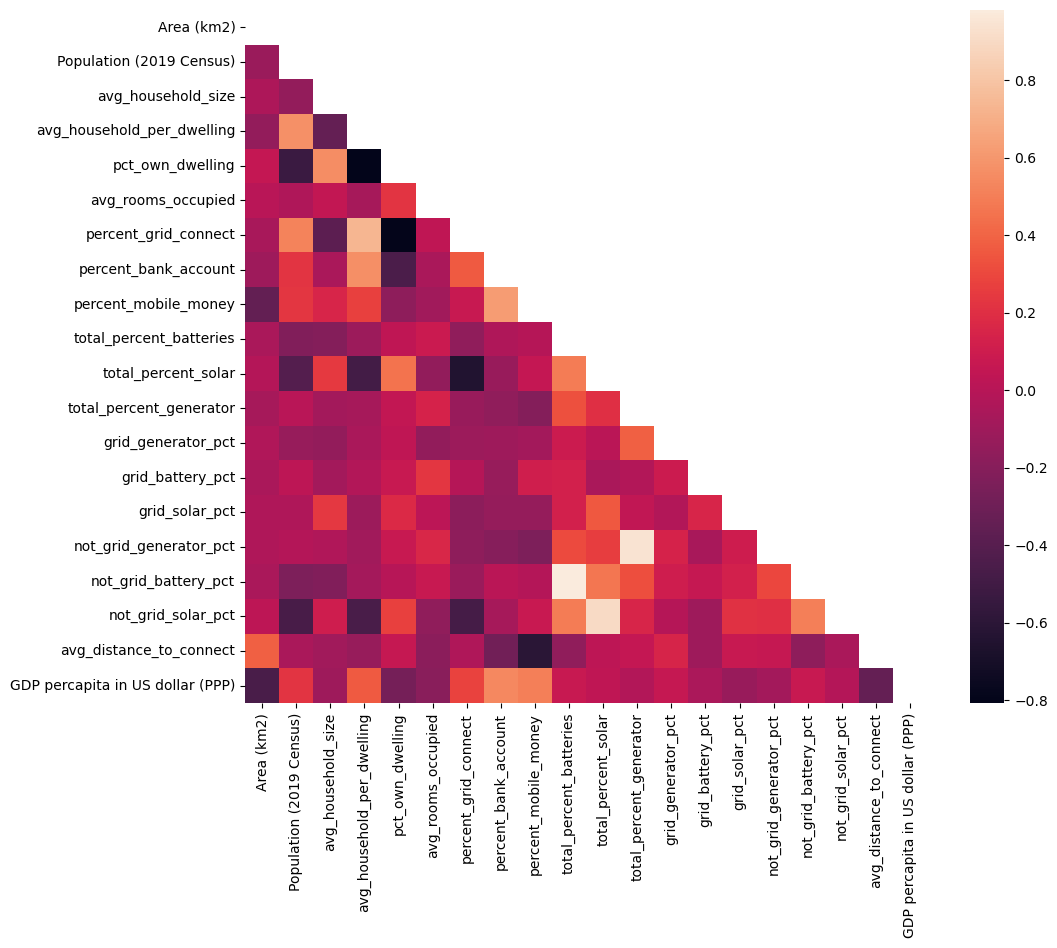

In [39]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix, mask=mask)

In [40]:
corr_matrix_target = corr_matrix.iloc[:,len(corr_matrix)-1]
corr_matrix_target = pd.DataFrame(corr_matrix_target).reset_index()
corr_matrix_target = corr_matrix_target.rename(columns={"index":"variable","GDP percapita in US dollar (PPP)":"target"})
corr_matrix_target

,variable,target
0,Area (km2),-0.463899
1,Population (2019 Census),0.222324
2,avg_household_size,-0.102597
3,avg_household_per_dwelling,0.363926
4,pct_own_dwelling,-0.270152
5,avg_rooms_occupied,-0.188248
6,percent_grid_connect,0.278087
7,percent_bank_account,0.540750
8,percent_mobile_money,0.502578
9,total_percent_batteries,0.071875


In [41]:
new_corr_matrix_target = corr_matrix_target[(corr_matrix_target['target']>0.2) | (corr_matrix_target['target']<-0.2)].iloc[:-1]
new_corr_matrix_target

,variable,target
0,Area (km2),-0.463899
1,Population (2019 Census),0.222324
3,avg_household_per_dwelling,0.363926
4,pct_own_dwelling,-0.270152
6,percent_grid_connect,0.278087
7,percent_bank_account,0.540750
8,percent_mobile_money,0.502578
18,avg_distance_to_connect,-0.341254


In [44]:
variables = new_corr_matrix_target["variable"].to_list()
variables

['Area (km2)',
 'Population (2019 Census)',
 'avg_household_per_dwelling',
 'pct_own_dwelling',
 'percent_grid_connect',
 'percent_bank_account',
 'percent_mobile_money',
 'avg_distance_to_connect']

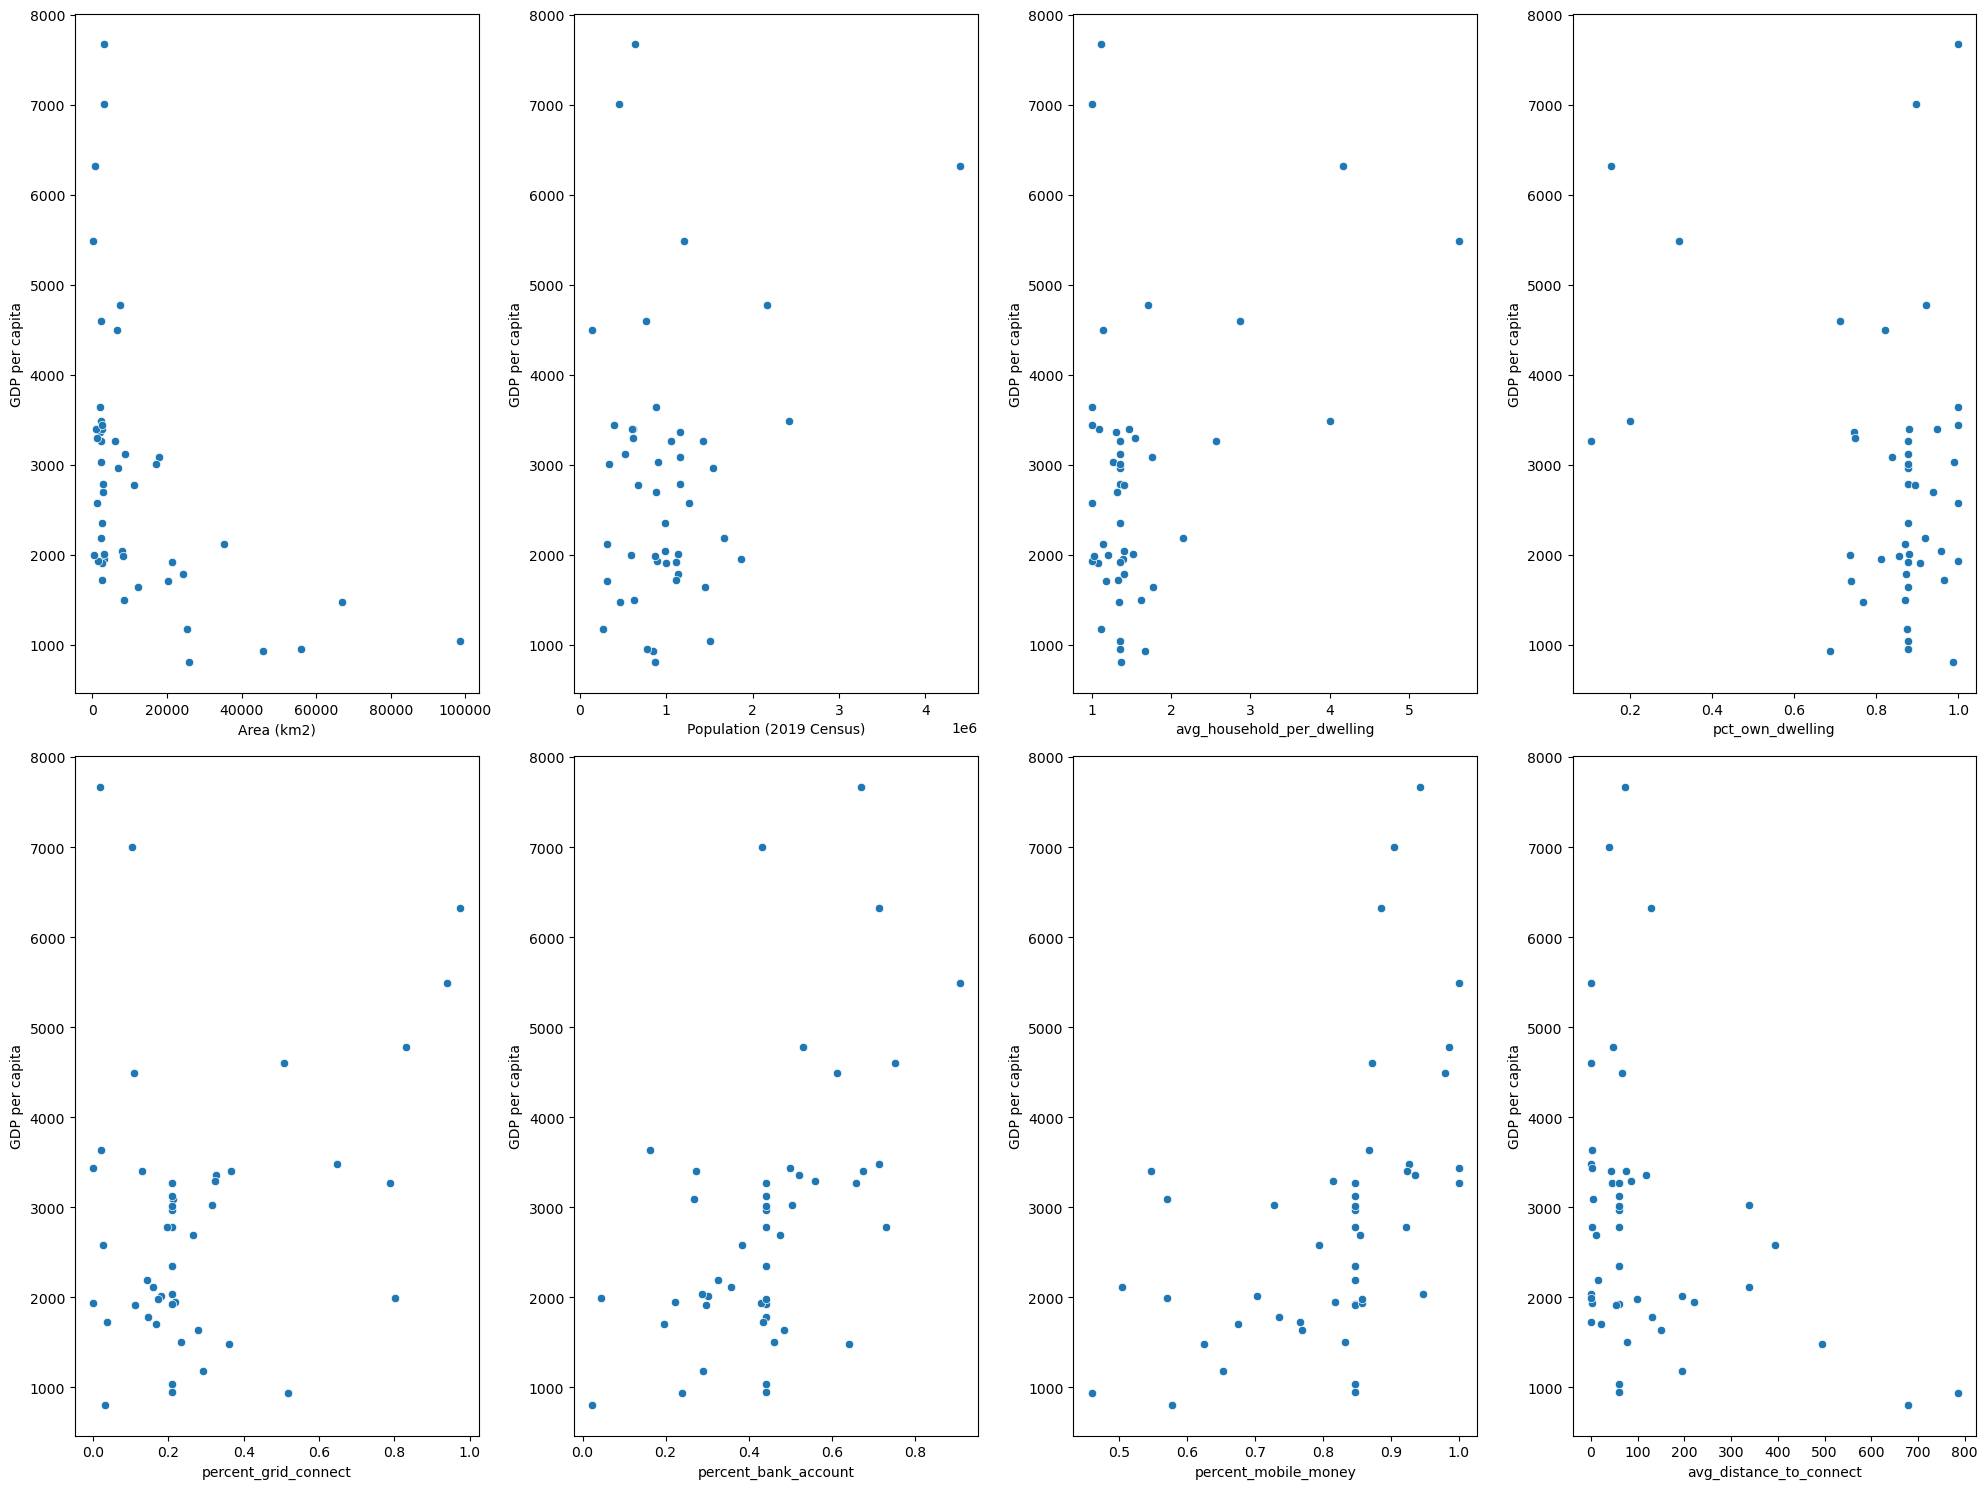

In [45]:
fig, axes = plt.subplots(2, 4, figsize=(20, 15))
for i, var in enumerate(variables):
    row, col = i // 4, i % 4
    ax = axes[row, col]
    sns.scatterplot(x=new_gdp_food_household_merge_no_county[var], y=new_gdp_food_household_merge_no_county['GDP percapita in US dollar (PPP)'], ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel('GDP per capita')
    
plt.tight_layout()
plt.show()

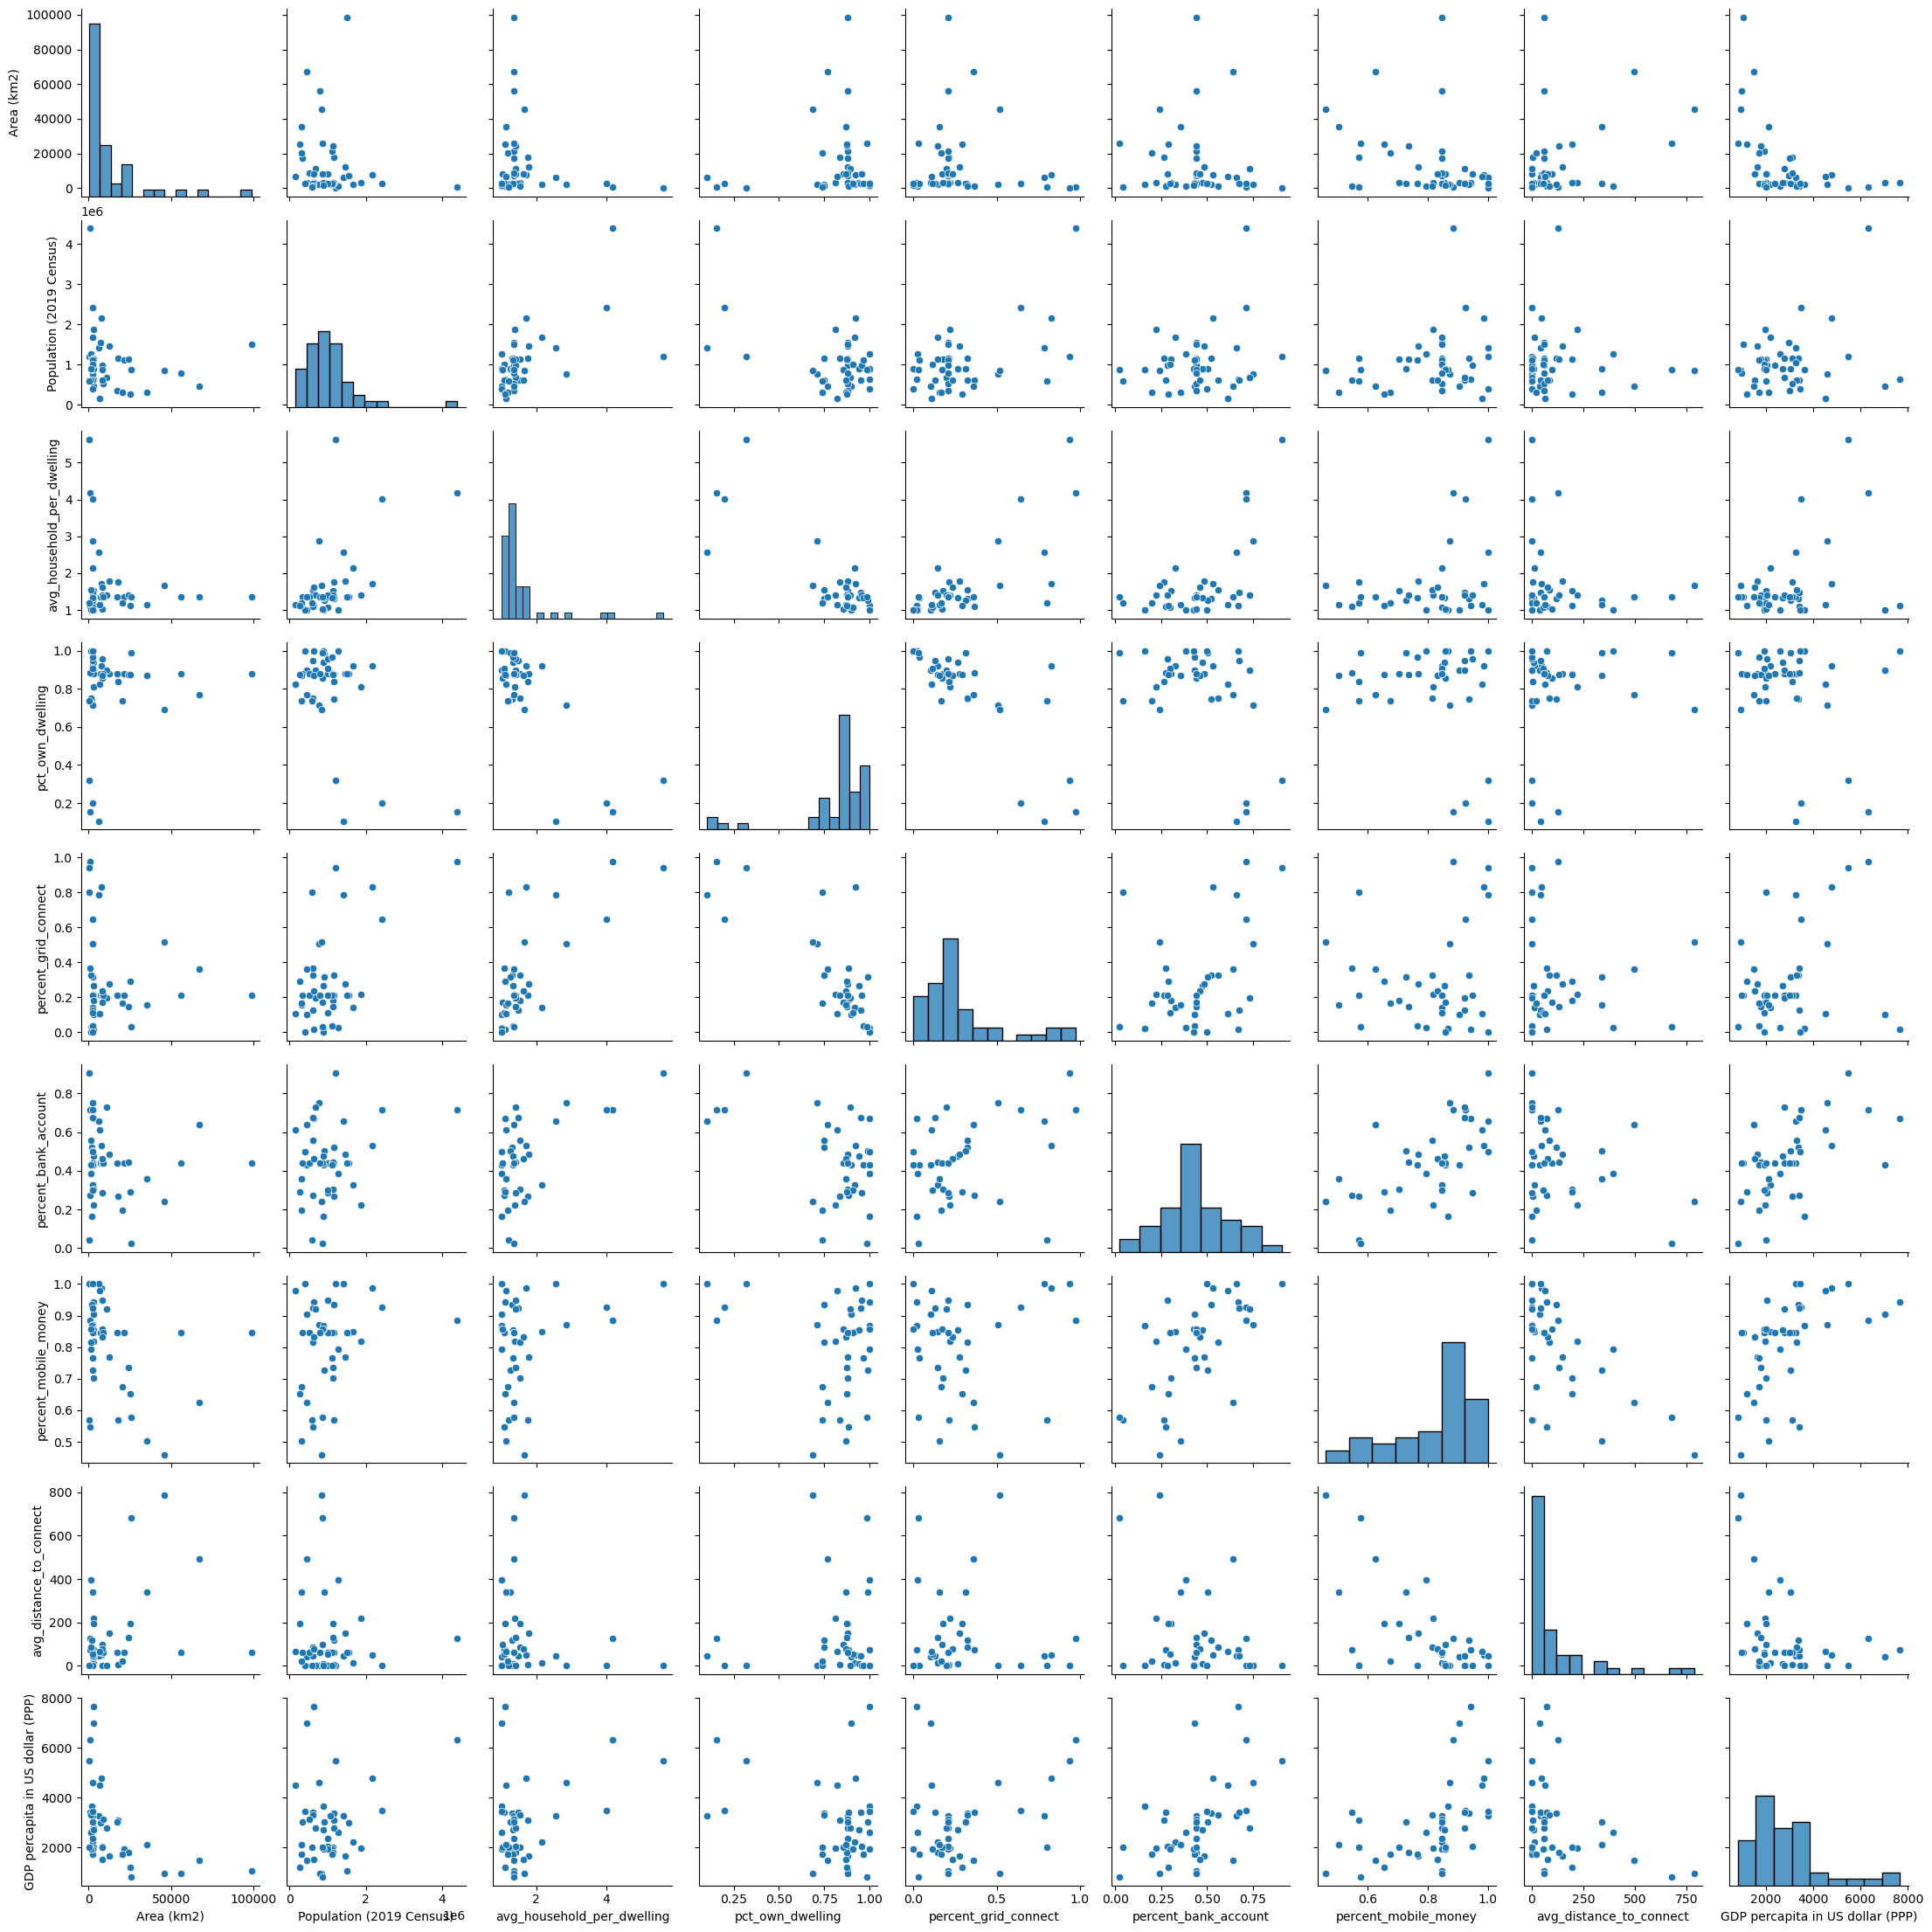

In [48]:
plot_data = new_gdp_food_household_merge_no_county[variables + ['GDP percapita in US dollar (PPP)']]

sns.pairplot(plot_data)
plt.show()

In [49]:
new_gdp_food_household_merge_no_county.to_csv("new_gdp_food_household_merge_no_county.csv")